<a href="https://colab.research.google.com/github/R4HUL-ROY/Digital-Image-Processing/blob/main/k_means_on_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Rahul Roy**

**Roll No : C91/MCA/202032**

**MCA 3RD SEM**

**Github link : https://github.com/R4HUL-ROY/Digital-Image-Processing**
****

# K-Means on Image when k is fixed

In [7]:
import numpy as np
import pandas as pd
import random
import math
import cv2
from google.colab.patches import cv2_imshow

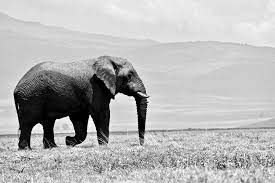

In [8]:
path = r'/content/drive/MyDrive/computer vision/opencv_img/images.jpg'
img = cv2.imread(path, 0)
cv2_imshow(img)

In [9]:
print(img)
data = img.flatten().astype(np.int)
print(len(data))

[[217 217 217 ... 232 232 232]
 [217 217 217 ... 234 234 234]
 [217 217 217 ... 237 237 237]
 ...
 [192 190 184 ... 195 195 195]
 [179 212 150 ... 188 188 188]
 [211 208 177 ... 191 191 191]]
50325


In [10]:
## K fixed k-means

import math
k = int(input("enter no of cluster : "))
random.seed(10)
centroids_index = random.sample(range(0,len(data)) , k)
print(centroids_index)
centroids = [data[i] for i in centroids_index]
print(f"initital random centroids picked : {centroids}\n")

enter no of cluster : 4
[37447, 2135, 28107, 31625]
initital random centroids picked : [1, 227, 12, 201]



In [11]:
def find_min(i, centroid):
    dist_list = [abs(j-i) for j in centroid]
    min_index = np.argmin(dist_list)
    return  min_index, centroid[min_index]

cluster_dict = {}
iter = 0
max_iter = 300

while True:
    old_centroids = centroids.copy()

    # creates initial empty clusters
    for i in range(k):
        cluster_dict[i] = list()

    # pushing all elements inside clusters that is in minimum distance
    for idx, i in enumerate(data):  
        index, val = find_min(i, centroids)
        cluster_dict[index].append(i)
        
    # Updating centroids
    for key, val in cluster_dict.items():
        centroids[key] = sum(val)/len(val)   

    if centroids == old_centroids:
        break   
    iter += 1
    if iter == max_iter:
        break


# Ouput clusters
for key, cluster in cluster_dict.items():
    print(f"cluster {key} --> {cluster}")


cluster 0 --> [63, 60, 54, 5, 30, 58, 22, 0, 40, 34, 42, 10, 0, 6, 11, 3, 59, 49, 4, 63, 55, 33, 40, 0, 15, 47, 51, 48, 49, 64, 5, 12, 12, 59, 3, 0, 28, 14, 61, 49, 22, 53, 54, 50, 53, 28, 31, 53, 60, 41, 46, 44, 42, 50, 51, 53, 48, 62, 31, 0, 18, 59, 52, 60, 55, 57, 51, 34, 3, 32, 42, 0, 10, 38, 52, 50, 58, 39, 46, 57, 24, 48, 64, 41, 46, 9, 2, 0, 52, 51, 51, 55, 57, 59, 6, 0, 13, 29, 38, 40, 47, 62, 1, 23, 27, 2, 52, 54, 51, 58, 38, 61, 53, 39, 43, 26, 38, 43, 46, 15, 23, 37, 49, 0, 18, 21, 62, 45, 64, 14, 17, 3, 0, 0, 33, 47, 59, 55, 61, 22, 26, 40, 9, 16, 22, 23, 0, 0, 13, 24, 52, 48, 8, 0, 54, 12, 10, 20, 15, 12, 20, 19, 0, 34, 56, 41, 50, 27, 9, 44, 24, 12, 8, 7, 12, 11, 1, 28, 60, 26, 19, 51, 51, 63, 62, 24, 21, 42, 14, 0, 0, 13, 8, 11, 0, 58, 58, 45, 18, 19, 32, 34, 27, 30, 25, 6, 0, 6, 1, 23, 22, 55, 57, 61, 18, 18, 61, 36, 11, 27, 31, 15, 2, 8, 0, 0, 0, 0, 0, 4, 43, 51, 57, 61, 40, 3, 35, 20, 38, 10, 17, 3, 0, 0, 23, 8, 63, 18, 53, 51, 64, 51, 58, 58, 62, 42, 61, 12, 14, 23, 

# fixed Threshold K-Means

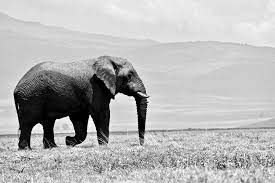

[[217 217 217 ... 232 232 232]
 [217 217 217 ... 234 234 234]
 [217 217 217 ... 237 237 237]
 ...
 [192 190 184 ... 195 195 195]
 [179 212 150 ... 188 188 188]
 [211 208 177 ... 191 191 191]]
50325


In [12]:
# data = [5,7,30,32,
#         6,31,34,75,
#         9,32,76,103,
#         104,108,110,102]

path = r'/content/drive/MyDrive/computer vision/opencv_img/images.jpg'
img = cv2.imread(path, 0)
cv2_imshow(img)

print(img)
data = img.flatten().astype(np.int)
print(len(data))

In [13]:
import numpy as np

def get_min_index(sid, pixel, threshold):
    diff_arr = [abs(i-pixel) for i in sid]
    index = np.argmin(diff_arr, axis = 0)
    return -1 if diff_arr[index] > threshold else index

def find_min_error(lst1, lst2):
    if len(lst1) != len(lst2):
        return 999999
    diff_arr = [abs(lst1[i]-lst2[i]) for i in range(len(lst1))]
    min_index = np.argmin(diff_arr, axis=0)
    return min_index


cluster_dict = {}
cluster_dict[0] = list()
sid = [data[0]]
last_dict_index = 0
threshold = int(input("Enter threshold value : "))
error = 0.01    ## Error value
iter = 0

while True:
    for cluster_key in cluster_dict.keys():
        cluster_dict[cluster_key] = list()

    old_sid = sid.copy()
    for pixel in data:
        index = get_min_index(sid, pixel, threshold)  #index is the cluster key in cluster_dict as well as the minimum sid from the sid array  -1 for nw cluster
        
        if index == -1:
            last_dict_index += 1
            cluster_dict[last_dict_index] = list()
            cluster_dict[last_dict_index].append(pixel)
            sid.append(pixel)
        else:
            cluster_dict[index].append(pixel)
            sid[index] = (sid[index]+pixel)/2
    min_error = find_min_error(old_sid, sid)
    iter += 1

    if min_error < error:
        break        

print(sid)
for key, val in cluster_dict.items():
    print(f"cluster - {key} --->  {val}")


Enter threshold value : 10
[208.52104652461506, 202.90744066154568, 199.0318497891875, 211.2114701013682, 196.42369942214168, 191.1967263434762, 182.60864496022717, 187.7735371650976, 177.14829400577747, 169.50626081010205, 166.07044912216156, 156.5034631353247, 150.78665745678944, 127.31108354863142, 159.71383972232906, 135.2659650459095, 83.57926829568984, 91.63203210784656, 64.28287573398717, 0.007876239264192121, 11.39083836450722, 119.80900249131953, 56.57929964396992, 140.2861790874901, 114.5355065311457, 72.81809820143933, 5.938247374135049, 25.59980529288468, 16.428094949674023, 47.37608193038611, 20.351953510939936, 220.5322064246435, 37.123517627994026, 216.93903706036087, 108.89259713718738, 225.88784644649513, 230.58429457884134, 32.1322981071518, 234.7997549918314, 242.31223326510656, 247.58261777372041, 254.19615965567505]
cluster - 0 --->  [206, 210, 215, 214, 217, 216, 217, 213, 217, 218, 218, 218, 218, 219, 219, 216, 216, 216, 217, 217, 218, 218, 218, 219, 218, 219, 21

# Adaptive Threshold K-Means

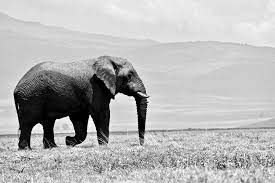

[[217 217 217 ... 232 232 232]
 [217 217 217 ... 234 234 234]
 [217 217 217 ... 237 237 237]
 ...
 [192 190 184 ... 195 195 195]
 [179 212 150 ... 188 188 188]
 [211 208 177 ... 191 191 191]]
50325


In [14]:
# data = [5,7,30,32,
#         6,31,34,75,
#         9,32,76,103,
#         104,108,110,102]

path = r'/content/drive/MyDrive/computer vision/opencv_img/images.jpg'
img = cv2.imread(path, 0)
cv2_imshow(img)

print(img)
data = img.flatten().astype(np.int)
print(len(data))

In [15]:
import numpy as np

def get_min_index(sid, pixel, threshold):
    diff_arr = [abs(i-pixel) for i in sid]
    index = np.argmin(diff_arr, axis = 0)
    return -1 if diff_arr[index] > threshold else index

def find_min_error(lst1, lst2):
    if len(lst1) != len(lst2):
        return 999999
    diff_arr = [abs(lst1[i]-lst2[i]) for i in range(len(lst1))]
    min_index = np.argmin(diff_arr, axis=0)
    return min_index


cluster_dict = {}
cluster_dict[0] = list()
sid = [data[0]]
last_dict_index = 0

threshold = np.std(np.array(data).flatten())
print(threshold)
error = 0.01
iter = 0

while True:
    for cluster_key in cluster_dict.keys():
        cluster_dict[cluster_key] = list()

    old_sid = sid.copy()
    for pixel in data:
        index = get_min_index(sid, pixel, threshold)  #index is the cluster key in cluster_dict as well as the minimum sid from the sid array  -1 for nw cluster
        
        if index == -1:
            last_dict_index += 1
            cluster_dict[last_dict_index] = list()
            cluster_dict[last_dict_index].append(pixel)
            sid.append(pixel)
        else:
            cluster_dict[index].append(pixel)
            sid[index] = (sid[index]+pixel)/2
    min_error = find_min_error(old_sid, sid)
    iter += 1

    if min_error < error:
        break        

print(sid)
for key, val in cluster_dict.items():
    print(f"cluster - {key} --->  {val}")

63.33399964463662
[208.6308397447352, 200.69628423603757, 190.71091685335955, 166.28727988598507, 142.37758543345777, 218.28275574162157, 99.02840172804363, 50.7277457665966]
cluster - 0 --->  [217, 217, 217, 217, 217, 217, 217, 217, 217, 217, 217, 218, 218, 219, 219, 219, 218, 218, 218, 218, 218, 218, 218, 218, 217, 217, 216, 216, 215, 215, 215, 214, 217, 217, 217, 217, 217, 217, 217, 217, 219, 219, 220, 220, 221, 221, 221, 222, 223, 223, 223, 224, 224, 225, 225, 225, 227, 227, 227, 227, 227, 227, 227, 227, 224, 224, 225, 225, 226, 226, 226, 227, 224, 224, 225, 225, 226, 226, 226, 227, 228, 228, 228, 229, 229, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 230, 229, 229, 230, 230, 231, 231, 231, 229, 230, 231, 231, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 229, 227, 227, 227, 228, 228, 229, 229, 229, 230, 230, 232, 233, 233, 233, 233, 233, 232, 232, 232, 233, 233, 233, 233, 233, 233, 233, 233, 230, 230, 229, 228, 227, 227, 226, 225, 229, 229, 229, 2

# How can we extract key frame from a video?

The key frame selected is based on the threshold we select.we compute threshold as the summation of mean of absolute difference (histogram difference between 2 consecutive frames ) and standard deviation of absolute difference. If it is greater than threshold than we select the first frame in the difference to be the key frame. One of the method select key-frame is using difference of histogram of consecutive frames.


Key frame extraction consists in providing an abstract of the entire video, containing the most informative frames. Extract key frame from a video types are given below : 1> Unsupervised Clustering - Shot Boundary Detection. 2> Motion Based Key Frame Extraction. 3> Shot Retrieval in Nearest Feature Line. 4> Histogram Differencing. 5> Region Based Key Frame Extraction. 6> Statistical Techniques Based Key Frame Extraction.

****

# How to model the background?

Background modeling is an efficient way to obtain foreground objects. Though background modeling methods for foreground detection have been studied for several decades. The purpose of background modeling is to remove interference from the background and to detect and extract the foreground moving target, to meet the needs of video surveillance. Classic foreground detection algorithms, such as frame difference, optical flow, and background subtraction, are implemented mainly through extracting interframe motion information, detecting optical flow change or background modeling.The general steps of these background modeling methods are as follows: First, set up a background model by using the first of first few frames of the video. Second, compare the background model to the current frame to obtain the foreground object. Finally, update the background model.

# Some background methods are given below 

1> Gaussian mixture model (GMM).

2> Kernel density estimator (KDE).

4> Adaptive Gaussian mixture model (AGMM).

5> Consensus-based method (SACON).
            

**In these types of methods we can model the background.**  

1> Dynamic Background and Static Background Segmentation.

2> Dynamic Background Modeling with Kernel Density Estimation.

****

# How to extract the foreground?

Foreground detection is one of the major tasks in the field of computer vision and image processing whose aim is to detect changes in image sequences. Background subtraction is any technique which allows an image's foreground to be extracted for further processing (object recognition etc.). Background subtraction is a widely used approach for detecting moving objects in videos from static cameras. The rationale in the approach is that of detecting the moving objects from the difference between the current frame and a reference frame, often called "background image", or "background model". Background subtraction is mostly done if the image in question is a part of a video stream.

Background subtraction is generally based on a static background hypothesis which is often not applicable in real environments. With indoor scenes, reflections or animated images on screens lead to background changes. Similarly, due to wind, rain or illumination changes brought by weather, static backgrounds methods have difficulties with outdoor scenes.

****